In [1]:
using CABLAB

In this Notebook we want to visualize the regions where cube variable take on their highest or lowest value. To do this we calculate the 99% and the 1% quantile for each variable from a subset of the data and afterwards count how often the quantile was exceeded for each variable in each grid cell.

In [2]:
c=Cube("/Net/Groups/BGI/scratch/fgans/cubecopy/datacube/")

CABLAB data cube at /Net/Groups/BGI/scratch/fgans/cubecopy/datacube/
Spatial resolution:  1440x720 at 0.25 degrees.
Temporal resolution: 2000-01-01T00:00:00 to 2011-01-01T00:00:00 at 8daily time steps
Variables:           BHR_VIS BurntArea DHR_VIS Emission GPP Ozone Precip Rg SoilMoisture TER fpar fpar_fluxcom t2m 


In [3]:
cdata=getCubeData(c,variable=c.dataset_files);

In [4]:
sampledata=sampleLandPoints(cdata,2000);

Get the quantiles for the subsample

In [5]:
quants=mapCube(timespacequantiles,sampledata,[0.01,0.99])

In-Memory data cube with the following dimensions
Quantile            Axis with elements: 0.01 0.99 
Variable            Axis with elements: BHR_VIS BurntArea DHR_VIS Emission GPP Ozone Precip Rg SoilMoisture TER fpar fpar_fluxcom t2m 


Define a function that counts quantile crossings for each grid cell

In [6]:
"""
How often the upper or lower quantiles are crossed in each time series
"""
function countExtremes(xout::AbstractArray,xin::AbstractVector,qvec::AbstractVector)
    nlow,nhigh=0,0
    qlow,qhigh=qvec
    for v in xin
        if !isnan(v)
            v<=qlow && (nlow+=1)
            v>=qhigh && (nhigh+=1)
        end
    end
    xout[1]=nlow
    xout[2]=nhigh
end

registerDATFunction(countExtremes,((TimeAxis,),(QuantileAxis,)),(QuantileAxis,),inmissing=(:nan,:nan),outmissing=:nan,no_ocean=1)

CABLAB.DAT.DATFunction(((CABLAB.Cubes.Axes.RangeAxis{DateTime,:Time,CABLAB.Cubes.Axes.YearStepRange},),(CABLAB.Cubes.Axes.CategoricalAxis{Float64,:Quantile},)),(CABLAB.Cubes.Axes.CategoricalAxis{Float64,:Quantile},),(),Any,(:nan,:nan),:nan,1,true,zero,identity,"auto")

In [7]:
@time o=mapCube(countExtremes,(cdata,quants),outtype=Int)

650.207858 seconds (1.40 G allocations: 108.923 GB, 4.27% gc time)


Temporary Data Cube with the following dimensions
Quantile            Axis with elements: 0.01 0.99 
Lon                 Axis with 1440 Elements from -180.0 to 179.75
Lat                 Axis with 720 Elements from 90.0 to -89.75
Variable            Axis with elements: BHR_VIS BurntArea DHR_VIS Emission GPP Ozone Precip Rg SoilMoisture TER fpar fpar_fluxcom t2m 


Now we plot the low extremes

"BHR_VIS"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
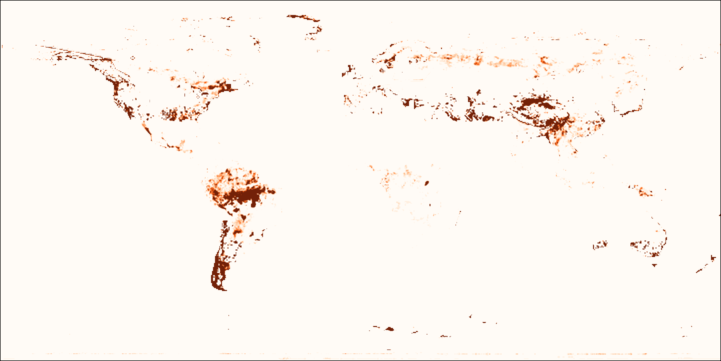

"BurntArea"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
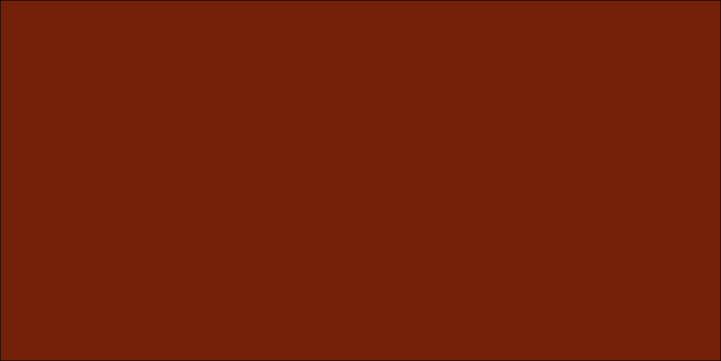

"DHR_VIS"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
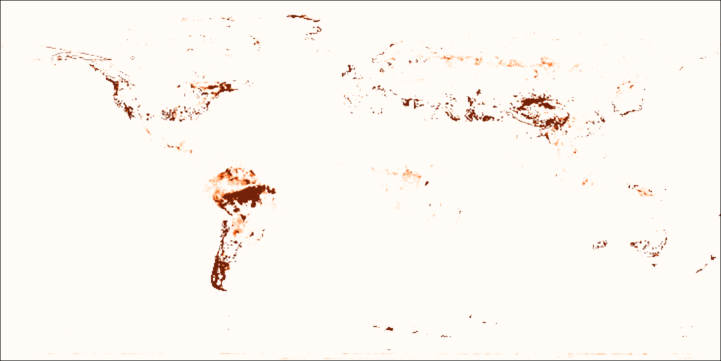

"Emission"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
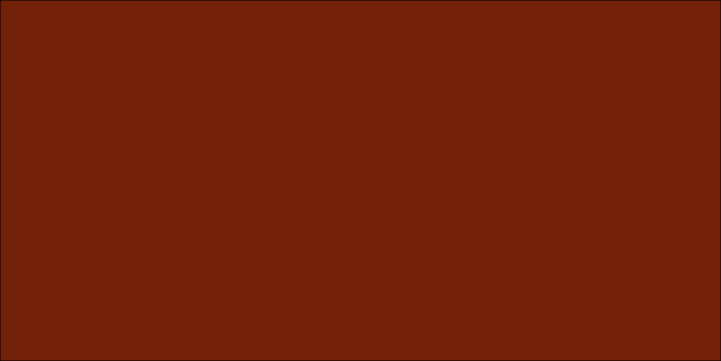

"GPP"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
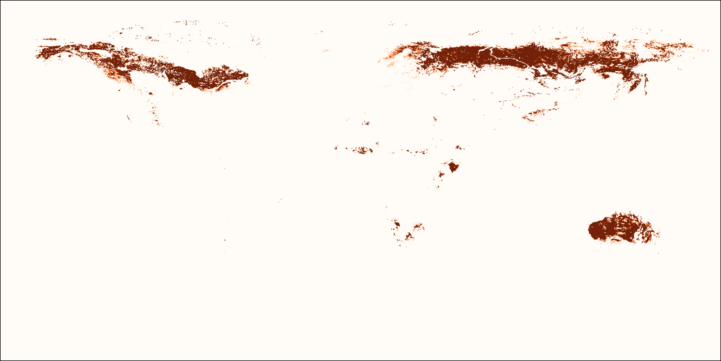

"Ozone"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
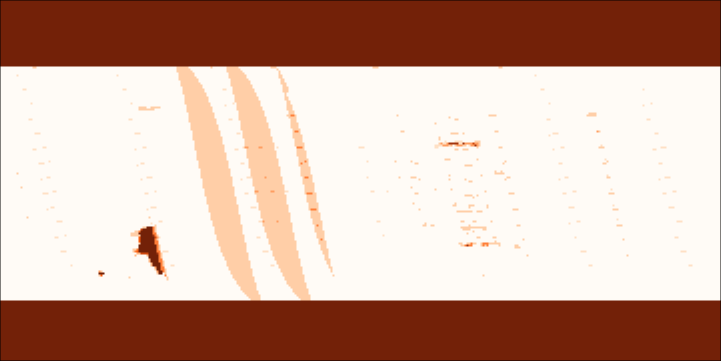

"Precip"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
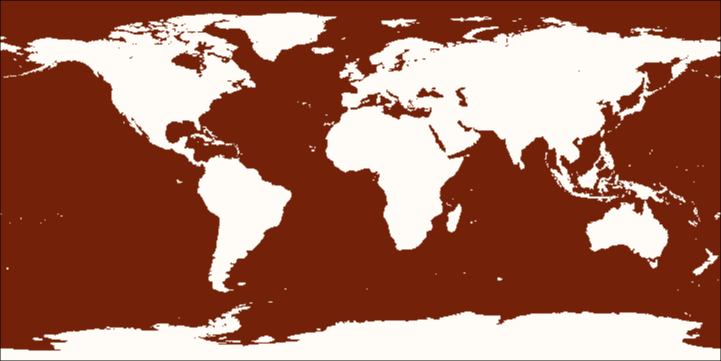

"Rg"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
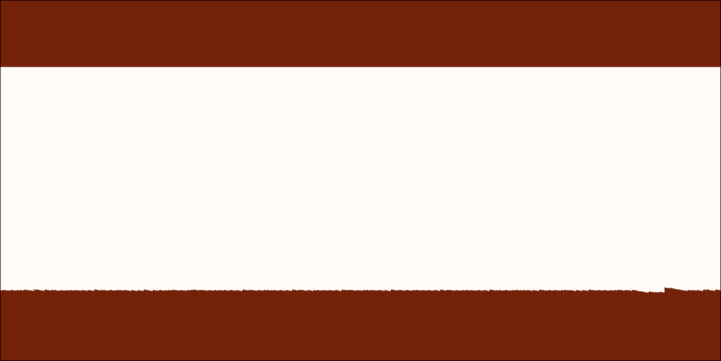

"SoilMoisture"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
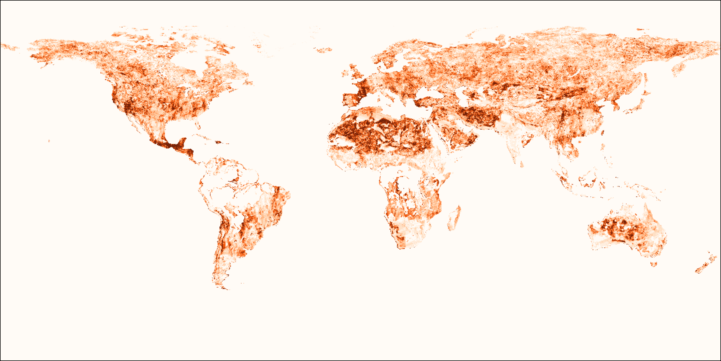

"TER"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
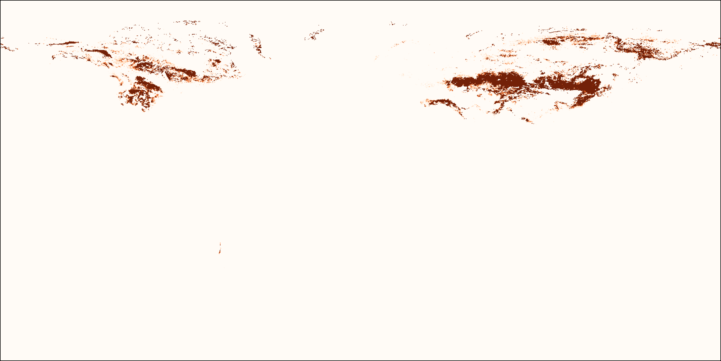

"fpar"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
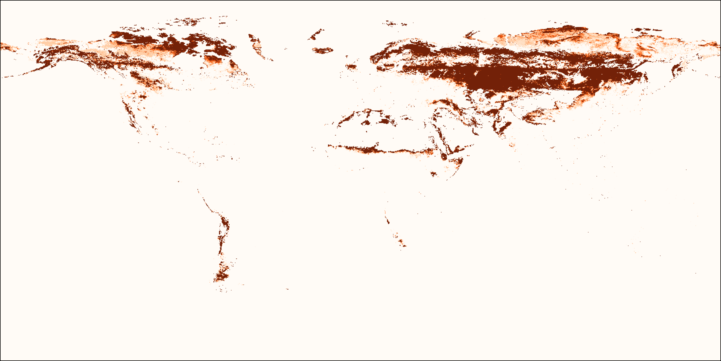

"fpar_fluxcom"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
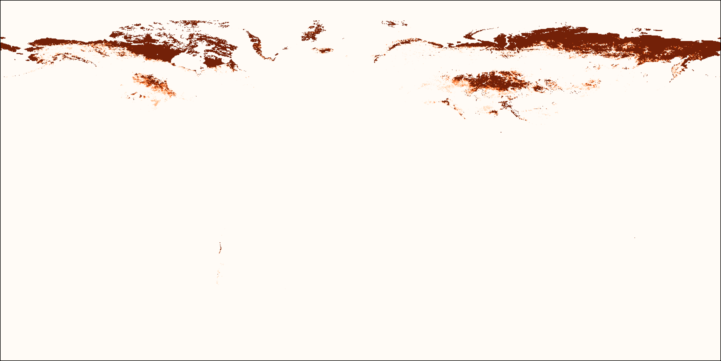

"t2m"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
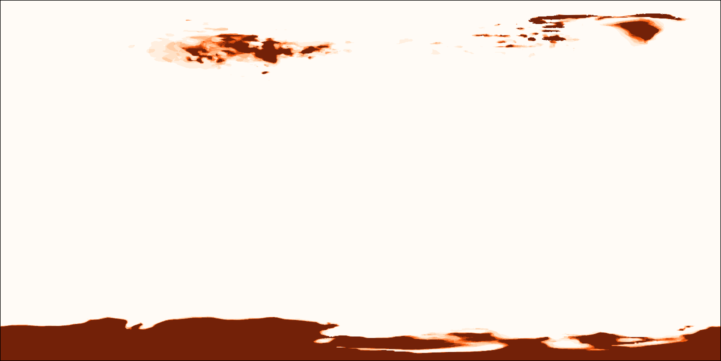

In [10]:
for i=1:13
display(o.axes[4].values[i])
display(plotMAP(o,dmax=10,quant=1,var=i))
end

And the high extremes

In [ ]:
for i=1:13
display(o.axes[4].values[i])
display(plotMAP(o,dmax=10,quant=2,var=i))
end

**Comments: Not underlying Map compare to the original**